In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
load_banking_reviews_data()

FileNotFoundError: 'BankReviews.csv' resource not found in 'mltoolkit_laht.data'

In [2]:
#!pip install mltoolkit-laht
import pandas as pd
from mltoolkit_laht import data_processing as dp
from mltoolkit_laht.datasets import load_banking_reviews_data

# ============================== Load Data ==============================
data_reader = dp.DataSource(data=load_banking_reviews_data())

# ============================== Data Preprocessing ==============================
BankReviews = data_reader.load_data(encoding="ISO-8859-1", sep=",")
BankReviews["Date"] = pd.to_datetime(BankReviews["Date"], format="%d-%m-%Y")
BankReviews["Year"] = BankReviews["Date"].dt.year
BankReviews["text_length"] = BankReviews.Reviews.apply(lambda x: len(x))

# ============================== Data Exploration ==============================
data_reader.show_df_info(num_rows=100)

FileNotFoundError: 'BankReviews.csv' resource not found in 'mltoolkit_laht.data'

### Update schema


In [3]:
org_schema = data_reader.get_schema()
org_schema

{'Date': 'datetime64[ns]',
 'Stars': 'int64',
 'Reviews': 'object',
 'BankName': 'object',
 'Year': 'int64',
 'text_length': 'int64'}

In [4]:
new_schema = {
    "Date": "datetime64[ns]",
    "Stars": "int64",
    "Reviews": "string",
    "BankName": "category",
    "Year": "int64",
    "text_length": "int64",
}

BankReviews = data_reader.update_schema(new_schema=new_schema)
data_reader.show_df_info(num_rows=100)

SAMPLE:
----------


,Date,Stars,Reviews,BankName,Year,text_length
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,2017,126
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,2017,159
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,2017,462
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,2017,605
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,2016,341




SCHEMA:
----------
Date           datetime64[ns]
Stars                   int64
Reviews                string
BankName             category
Year                    int64
text_length             int64
dtype: object

DATAFRAME SHAPE:
----------
(505, 6)

NANs:
----------
Date           0
Stars          0
Reviews        0
BankName       0
Year           0
text_length    0
dtype: int64

GENERAL DUPLICATED:
----------
2

STATISTICS:
----------


,Date,Stars,Reviews,BankName,Year,text_length
count,505,505.000000,505,505,505.000000,505.000000
unique,NaN,NaN,397,7,NaN,NaN
top,NaN,NaN,"\nI worked with Kory Klossner, a loan officer ...",North American Savings Bank,NaN,NaN
freq,NaN,NaN,4,193,NaN,NaN
mean,2017-01-07 23:00:07.128712960,4.247525,NaN,NaN,2016.526733,437.881188
min,2016-01-01 00:00:00,1.000000,NaN,NaN,2016.000000,13.000000
25%,2016-07-03 00:00:00,5.000000,NaN,NaN,2016.000000,174.000000
50%,2017-01-11 00:00:00,5.000000,NaN,NaN,2017.000000,347.000000
75%,2017-07-07 00:00:00,5.000000,NaN,NaN,2017.000000,528.000000
max,2018-01-01 00:00:00,5.000000,NaN,NaN,2018.000000,2949.000000



INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         505 non-null    datetime64[ns]
 1   Stars        505 non-null    int64         
 2   Reviews      505 non-null    string        
 3   BankName     505 non-null    category      
 4   Year         505 non-null    int64         
 5   text_length  505 non-null    int64         
dtypes: category(1), datetime64[ns](1), int64(3), string(1)
memory usage: 20.7 KB
----------
None


North American Savings Bank       193
Guarenteed Rate Inc                81
Triumph Lending                    60
Reliance First Capital             58
Pacific Beneficial Mortgage Co     51
LoanSnap                           40
Wyndham Capital Mortgage           22
Name: BankName, dtype: int64

In [12]:
from mltoolkit_laht.visualization import DistributionPlot

features_visualizer = DistributionPlot()
features_visualizer.plot_distributions(
    data=BankReviews.Reviews,
    show_kde=True,
    combine_plots=False,
    standardize=False,
)

No numerical data to plot.
No categorical data to plot.


In [9]:
BankReviews

,Date,Stars,Reviews,BankName,Year,text_length
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,2017,126
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,2017,159
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,2017,462
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,2017,605
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,2016,341
...,...,...,...,...,...,...
500,2016-02-06,1,I never write reviews but had to this time to...,North American Savings Bank,2016,2456
501,2016-07-25,1,It all started when Bob G ran a credit check ...,North American Savings Bank,2016,826
502,2017-09-27,1,What a horrible experience. We have excellent...,North American Savings Bank,2017,750
503,2017-12-24,1,"Rep was extremely professional, friendly, and...",North American Savings Bank,2017,1098


In [17]:
import pandas as pd

pd.api.types.is_object_dtype(df.Date)

True

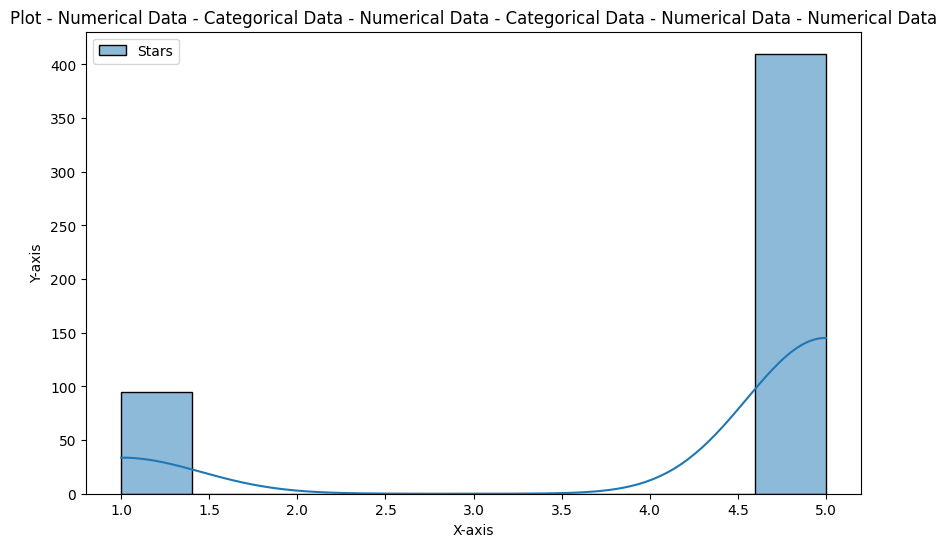

In [19]:
plot_bankName.plot_distribution(df)

In [36]:
df.dtypes

Date        object
Stars        int64
Reviews     object
BankName    object
dtype: object